Benoit's version:
## PAP Model
To do:
x Draw the 3D mac graph
* Make the iterations code Figure 2 and Figure 3 in Matlab

In [6]:
#import math
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import ZAF as zaf
import CalcI_file
from CalcI_file import CalcI
from matplotlib import cm
# to display dataframes

# INPUTS
# concentration
# Indices in Python start at 0
################ INPUTS ###################
Meas_El = [11, 19, 20, 22, 25, 26, 24, 8, 14, 13, 12, 15, 56, 28, 9, 17]  # length 16
element_indices = np.array([12,13,8]) # atomic numbers
element_indices = element_indices - 1 # python start at zero
# Std_AtWtPc
number_of_standards = 3
Cel = np.zeros((number_of_standards,92))
Std_AtWtPc = Cel

Std_AtWtPc[:, [10, 18, 19, 21, 24, 25, 23, 7, 13, 12, 11, 14, 55, 27, 8, 16]] = np.array([
    [8.75,0.02,0.00,0.00,0.00,0.05,0.00,48.82,32.13,10.25,0.00,0.00,0.00,0.00,0.00,0.00],
    [0.80,12.40,0.00,0.00,0.00,0.00,0.00,46.14,30.06,9.90,0.00,0.00,0.00,0.00,0.00,0.00],
    [1.03,0.00,15.33,0.00,0.06,1.24,1.08,44.38,25.68,1.06,10.10,0.00,0.00,0.04,0.00,0.00],
    [0.00,0.00,0.00,31.76,36.42,0.00,0.00,31.82,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00],
    [0.00,0.00,0.00,0.00,0.00,69.93,0.00,30.07,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00],
    [0.00,0.00,0.00,0.00,0.00,0.00,68.45,31.55,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00],
    [0.00,0.00,0.00,0.00,0.00,0.00,0.00,53.26,46.74,0.00,0.00,0.00,0.00,0.00,0.00,0.00],
    [0.00,0.00,3.00,0.00,0.37,17.14,0.00,42.52,18.36,11.76,6.86,0.00,0.00,0.00,0.00,0.00],
    [0.00,0.00,39.02,0.00,0.00,0.00,0.00,38.92,0.00,0.00,0.00,18.31,0.00,0.00,3.40,0.35],
    [0.00,0.00,0.00,0.00,0.00,2.39,0.00,45.00,19.65,0.00,32.88,0.00,0.00,0.00,0.00,0.00],
])
# Standards to use with each acquisition
number_of_acquisitions = number_of_standards
EPMA_Std = np.zeros((number_of_acquisitions,92))
EPMA_Std[:,[10, 18, 19, 21, 24, 25, 23, 7, 13, 12, 11, 14]] =np.array([
    [0,1,2,3,3,4,5,6,2,1,2,2], # have changed the last value
    [0,1,2,3,3,4,5,6,2,1,2,2], # have changed the last value
    [0,1,2,3,3,4,5,6,2,1,2,2], # have changed the last value
])
# Std_AtWtPc[:, [11,12,7,24]] = np.array([
#     [60.3, 0, 39.7, 0],  # MgO
#     [0, 52.92, 47.08, 0],  # Al2O3
#     [0, 0, 30.06, 69.94]  # Fe2O3 15kV, 10nA
# ])
print(Std_AtWtPc)
################ INPUTS ###################

# np.put(Cel, element_indices, [8.75,0.02,0.00,0.00,0.00,0.05,0.00,48.82,32.13,10.25,0.00,0.00,0.00,0.00,0.00,0.00])

# importing all elements with their atomic number, atomic weights and density
elements_df = zaf.get_element([])
# importing all the macs
# mac_df = pd.read_csv("Henke 1993_modified.txt")
mac_df = pd.read_csv("MAC30.txt")
print(elements_df)
# converting element_df into a numpy Z,A,Density
A_np = np.zeros((1,92))
Z_np = np.zeros((1,92))
density_np = np.zeros((1,92))
for i in range(0,92): # element zAbs
        A_np[0,i] = elements_df[['molar_mass','element']].to_numpy()[i,0]
        Z_np[0,i] = elements_df[['atomic_number','element']].to_numpy()[i,0]
        density_np[0,i] = elements_df[['density','element']].to_numpy()[i,0]


[[ 0.    0.    0.    0.    0.    0.    0.   39.7   0.    0.    0.   60.3
   0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
   0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
   0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
   0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
   0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
   0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
   0.    0.    0.    0.    0.    0.    0.    0.  ]
 [ 0.    0.    0.    0.    0.    0.    0.   47.08  0.    0.    0.    0.
  52.92  0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
   0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
   0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
   0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
   0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
   0.    0. 

In [7]:
# EXTRACTING THE MACKALPHA...
## MACKalpha
MACKalpha = mac_df[['zAbs', 'zMes','Ka']]
MACKbeta = mac_df[['zAbs', 'zMes', 'Kb']]
MACLalpha = mac_df[['zAbs', 'zMes', 'La']]
MACLbeta = mac_df[['zAbs', 'zMes', 'Lb']]
MACLl = mac_df[['zAbs', 'zMes', 'Ll']]
MACMa = mac_df[['zAbs', 'zMes', 'Ma']]
MACMb = mac_df[['zAbs', 'zMes', 'Mb']]

# reorganizing the matrix to have 92x92
MACKalpha_np_indices = MACKalpha.to_numpy()
MACKbeta_np_indices = MACKbeta.to_numpy()
MACLalpha_np_indices = MACLalpha.to_numpy()
MACLbeta_np_indices = MACLbeta.to_numpy()
MACLl_np_indices = MACLl.to_numpy()
MACMa_np_indices = MACMa.to_numpy()
MACMb_np_indices = MACMb.to_numpy()

# MAC Matrices
MACKalpha_np = np.zeros((92,92))
MACKbeta_np = np.zeros((92,92))
MACLalpha_np = np.zeros((92,92))
MACLbeta_np = np.zeros((92,92))
MACLl_np = np.zeros((92,92))
MACMa_np = np.zeros((92,92))
MACMb_np = np.zeros((92,92))

for i in range(0,92): # element zAbs
    for j in range(1,93): # element zMes
        MACKalpha_np[i,j-1] = MACKalpha_np_indices[(j-1) + 92 * i,2]
        MACKbeta_np[i,j-1] = MACKbeta_np_indices[(j-1) + 92*i, 2]
        MACLalpha_np[i,j-1] = MACLalpha_np_indices[(j-1) + 92*i, 2]
        MACLbeta_np[i,j-1] = MACLbeta_np_indices[(j-1) + 92*i, 2]
        MACLl_np[i,j-1] = MACLl_np_indices[(j-1) + 92*i, 2]
        MACMa_np[i,j-1] = MACMa_np_indices[(j-1) + 92*i, 2]
        MACMb_np[i,j-1] = MACMb_np_indices[(j-1) + 92*i, 2]

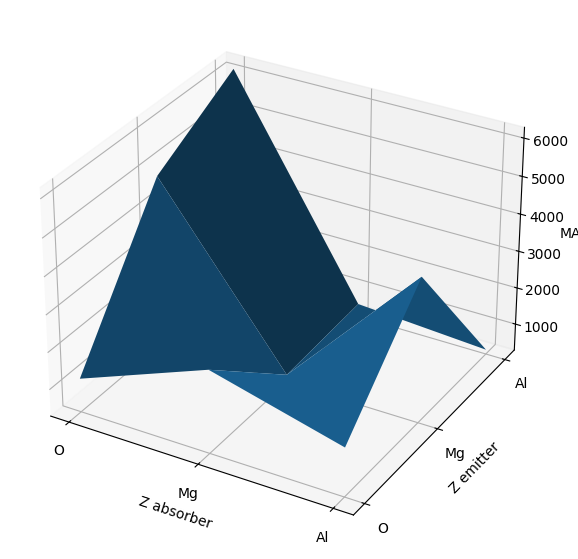

In [8]:
from mpl_toolkits.mplot3d import Axes3D


Meas_Elsort = sorted(Meas_El)
NameEl = ['H', 'He', 'Li', 'Be', 'B', 'C', 'N', 'O', 'F', 'Ne', 'Na', 'Mg', 'Al', 'Si', 'P', 'S', 'Cl', 'Ar', 'K', 'Ca', 'Sc', 'Ti', 'V', 'Cr', 'Mn', 'Fe', 'Co', 'Ni', 'Cu', 'Zn', 'Ga', 'Ge', 'As', 'Se', 'Br', 'Kr', 'Rb', 'Sr', 'Y', 'Zr', 'Nb', 'Mo', 'Tc', 'Ru', 'Rh', 'Pd', 'Ag', 'Cd', 'In', 'Sn', 'Sb', 'Te', 'I', 'Xe', 'Cs', 'Ba', 'La', 'Ce', 'Pr', 'Nd', 'Pm', 'Sm', 'Eu', 'Gd', 'Tb', 'Dy', 'Ho', 'Er', 'Tm', 'Yb', 'Lu', 'Hf', 'Ta', 'W', 'Re', 'Os', 'Ir', 'Pt', 'Au', 'Hg', 'Tl', 'Pb', 'Bi', 'Po', 'At', 'Rn', 'Fr', 'Ra', 'Ac', 'Th', 'Pa', 'U']

nMsEl = len(Meas_Elsort)

# Assuming MACkalpha is a 2D numpy array
MACkalpha_Ms = MACKalpha_np[np.ix_(np.array(Meas_Elsort)-1, np.array(Meas_Elsort)-1)]

fig = plt.figure(figsize=(7,7))
ax = fig.add_subplot(111, projection='3d')

X, Y = np.meshgrid(np.arange(nMsEl), np.arange(nMsEl))
ax.plot_surface(X, Y, MACkalpha_Ms) #, cmap=cm.coolwarm

ax.set_xticks(np.arange(nMsEl))
ax.set_yticks(np.arange(nMsEl))

ax.set_xticklabels([NameEl[i-1] for i in Meas_Elsort])  # Python indexing starts at 0
ax.set_yticklabels([NameEl[i-1] for i in Meas_Elsort])  # Python indexing starts at 0

#ax.set_zscale('log')

ax.set_xlabel('Z absorber')
ax.set_ylabel('Z emitter')
ax.set_zlabel('MAC')

plt.show()



In [9]:
# importing the global variable in the module
eps = 3 * 2.2204e-16
CalcI_file.A_np = A_np
CalcI_file.Z_np = Z_np
CalcI_file.MeasuredEl = (Std_AtWtPc > eps)[0]
# CalcI_file.element_indices = element_indices
"""
    @ should be changed you are not dealing with K lines
"""
Eo = 15 # keV
Std_AtWtPc = Std_AtWtPc/100 # converting weigth percentage to percentage O.XX
# checked with data of benoit
# import scipy.io
# MACKalpha_b = scipy.io.loadmat('MACKalpha_benoit.mat')
# MACKalpha_b = MACKalpha_b['MAC']
# print(MACKalpha_b)
# print(MACKalpha_b[3,14])
# print(MACKalpha_b)
""" Cel is the Std_AtWtPc """
# print(CalcI(Cel,Eo,MACKalpha_np)) # verified gives the same result like the benoit!

' Cel is the Std_AtWtPc '

0
(92,)
[0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 3.95274089e-03
 0.00000000e+00 0.00000000e+00 0.00000000e+00 9.35852228e-07
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 

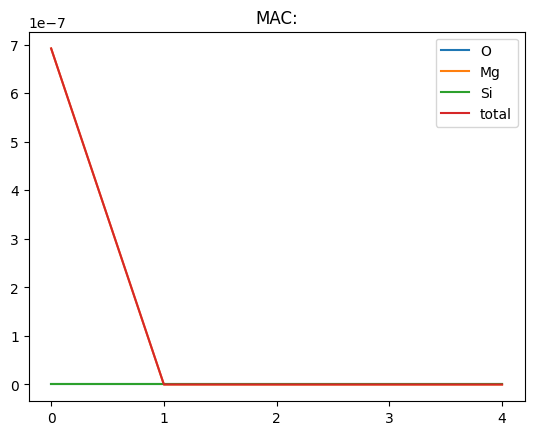

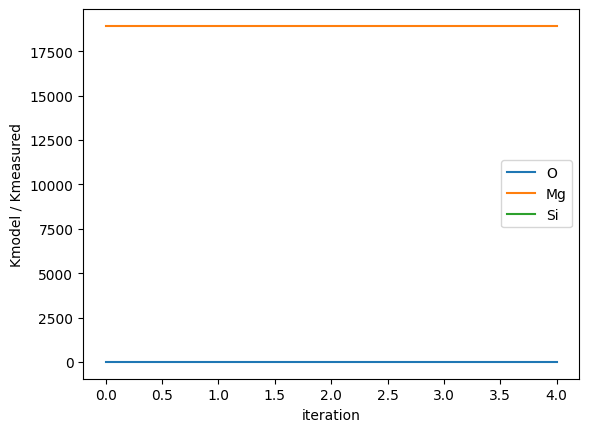

In [10]:
# regression
# number of standards
nStd = 1

# standards weight fractions
element_indices = np.array([11, 19, 20, 22, 25, 26, 24, 8, 14, 13, 12, 15, 56, 28, 9, 17]) # atomic numbers
element_indices = element_indices - 1 
""" @Standard composition (At. wt. %) - ! should convert!!!!!! """
# Std_AtWtPc = np.zeros((nStd,92))
# np.put(Std_AtWtPc,element_indices,[8.75,0.02,0.00,0.00,0.00,0.05,0.00,48.82,32.13,10.25,0.00,0.00,0.00,0.00,0.00,0.00])

# python start at zero
# 
# Cel = np.zeros((1,92))
# np.put(Cel, element_indices, [8.75,0.02,0.00,0.00,0.00,0.05,0.00,48.82,32.13,10.25,0.00,0.00,0.00,0.00,0.00,0.00])
# Cstd = Std_AtWtPc/100 already divided by 100 when assigning
""" Should we divid by 100 or not!? """
"""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""" SHOULD FIX THIS to be related to EPMA_Std"""""
# Assuming EPMA_Std is a numpy array
Cstd = np.zeros_like(EPMA_Std) * np.nan
which = EPMA_Std > 0  # select used standards - khalil: elements present in the standard sample
row = EPMA_Std[which]

Cstd = Std_AtWtPc/100 
# print('Std_AtWtPc', Std_AtWtPc.shape)
# print(Std_AtWtPc[:,element_indices])
IntPAPstd = np.zeros((nStd, 92))
# standard intensity PAP 
""" IntPAPstd seems to give the same result as benoit code """
for i in range(nStd):
    IntPAPstd[i,:] = CalcI(Std_AtWtPc[i], Eo, MACKalpha_np) 
    """ NO need to divid by 100 Std_ATwtpc"""

# Intensities
element_indices_intensities = np.array([11, 19, 20, 22, 25, 26, 24, 8, 14, 13, 12, 15]) # atomic numbers
element_indices_intensities = element_indices_intensities - 1
""" Isp & Istd seems to be correct """
Isp = np.zeros((1,92))
Istd = np.zeros((1,92))

np.put(Istd, element_indices_intensities, [120.5,161.2,244.1,683.4,156.6,326,280.6,156.6,381.9,142.2,255.8,0]) # checked
np.put(Isp, element_indices_intensities, [-0.1391,-0.2086, -0.2483, -0.2583,-0.1291, -0.1490, -0.0993, 155.9192, 741.2866,-0.2086, 0.0397, 0.0000]) # checked

# remove negative values 
Istd[Istd < 0] = 0
Isp[Isp < 0] = 0

# k ratios
KRatiosMsrd = (Isp/Istd) # checked
""" This part of the code wasn't added """
# KRatiosMsrdNorm = KRatiosMsrd;
# KRatiosMsrdNorm(KRatiosMsrdNorm~=KRatiosMsrdNorm) = 0; % to remove NaN values
# KRatiosMsrdNorm = KRatiosMsrdNorm ./ repmat(sum(KRatiosMsrdNorm,2),1,92); % normalize
# KRatiosMsrdNorm(Isp~=Isp) = NaN;
""" END """
""" Cstd is different from benoit, mine should be correct because his change the values after assigning StdAtWt to Cstd"""
Csp_i = (Isp/Istd) * Cstd # Castaing's first approximation

##
np.nan_to_num(Csp_i, copy=False, nan=0, posinf=0, neginf=0)
#
ntests = 5
j = 0
IntPaPsp_t = np.zeros((ntests, 92))
KRatiosMdl = IntPaPsp_t
KRatiosMdlNorm = IntPaPsp_t

Csps = np.zeros((ntests, 92))
Csp_t = Csp_i[j,:]
Csps[0,:] = Csp_t.reshape(92,1).flatten()
""""""""""""""""""""" VERIFIED UNTIL HERE """""""""""""""""""""

for i in range(ntests):
    #Csp_t[Csp_t < 0] = 0
    ##
    print(i)
    print(Csp_t.reshape(92,1).flatten().shape)
    print(Csp_t.reshape(92,1).flatten())
    IntPaPsp_t[i,:] = CalcI(Csp_t.reshape(92,1).flatten(), Eo, MACKalpha_np)
    IntRatio = IntPaPsp_t[i,:]/IntPAPstd[j,:]
    sumKmdl = sum(IntRatio[IntRatio > 0])
    sumKmsrd = sum(KRatiosMsrd[KRatiosMsrd > 0])
    rat = sumKmsrd/sumKmdl
    Csp_t = Csp_t * KRatiosMsrd/(IntRatio)
    np.nan_to_num(Csp_t, copy=False, nan=0, neginf=0, posinf=0)
    KRatiosMdl[i,:] = IntRatio * rat
    Csps[i,:] = Csp_t

df = pd.DataFrame(Csps, columns=elements_df.element[elements_df.index < 92])

# print(df.loc[:, df.ne(0).any()])

# Assuming Csps, KRatiosMdl, KRatiosMsrd, j, and Macfilename are defined
Tot = np.nansum(Csps, axis=1)

plt.figure()
plt.plot(Csps[:, [7, 11, 13]])  # Python indexing starts at 0
plt.plot(Tot)
plt.xticks(np.arange(0, ntests, 1))
plt.legend(['O', 'Mg', 'Si', 'total'])
plt.title(f'MAC:')

whichEl = [7, 11, 13]  # Python indexing starts at 0
nselecEl = len(whichEl)
# print('KratioMdl')
# print(KRatiosMdl)
# print('KratiosMsrd')
# print(KRatiosMsrd)
print('---------------------------------------------------')
# print(KRatiosMsrd[:, whichEl])
print(KRatiosMdl.size)
print(KRatiosMsrd.size)
print(KRatiosMdl)
print(KRatiosMsrd)
j = 0 # standard used
Kdiv = KRatiosMdl[:,whichEl] / KRatiosMsrd[j][whichEl]
print(Kdiv)

plt.figure()
plt.plot(Kdiv)


# print(Kdiv)
plt.legend([NameEl[i] for i in whichEl])
plt.ylabel('Kmodel / Kmeasured')
plt.xlabel('iteration')
plt.show()

# print(IntPaPsp_t)
# print('#########################################################')
# print(Csps)